<img src = "cl-logo.png"> 
***
## Craigslist library

Laura Goyeneche <br>
MSPPM Data Analytics '20 <br>
Heinz College <br>
Carnegie Mellon University <br>

### Index 

1. <a href = "#int" >Introduction</a>
2. <a href = "#lib" >Requirements</a>
3. <a href = "#desc">Library description</a>
4. <a href = "#app" >Example application</a>
5. <a href = "#con" >Conclusion</a>
6. <a href = "#ref" >References</a>
7. <a href = "#anx" >Annexes</a>

## <a id = "int">Introduction</a>
This tutorial will introduce you to the `craigslist` library, and will walk you through an introductory analysis of the data. *Craigslist* corresponds to one of the most powerful websites for online marketing. Its marketplace connects buyers and sellers in 570 cities over 70 countries. With this information you can gather relevant inputs about the behavior of different markets in order to respond many questions such as, how are the housing prices around a specific area? what type of jobs one can find through Craigslist? how often individuals use it for meeting people?, among others.

## <a id = "lib">Requirements</a>

### Installation
For the following analysis, you'll be using two libraries in particular: `craiglist` and `plotly`. The first one, corresponds to the data of interest. The section <a href = "#desc">Library description</a> will provide you with the details of this dataset and its fascinating different types of information. The second one, you'll be using it through the notebook to create interactive visualizations; some basic description will be find as well. The installation using `pip` is: <br>

`pip install python-craigslist` <br>
`pip install plotly==4.1.0` <br>

Considering that Craigslist contains text data, this tutorial requires the library `wordcloud`. This library will allow you to create basic analysis with text. The installation using `pip` is: <br>

`pip install wordcloud` <br>

### Importing

After you install the libraries, run the following commands and make sure that they're run without mistake. Sometimes `craigslist` library don't run in the first attempt due to connection. **Don't worry, this is normal !** Run it for the second time, it should work. 

In [2]:
# Craigslist
import craigslist as cl

# Plotly
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Word Cloud
import wordcloud
from wordcloud import WordCloud

# Other
import pandas as pd
import numpy as np

pio.renderers.default = "notebook_connected"

Before we start exploring this library, let me respond **few questions** that you may have right now:

1. *Why aren't you directly scrapping the information from the Craigslist website?*

    * Well, that's a great question! Simple answer: it was easier. Someone already took the time to scrapped the information for us. Why should we bother? In this tutorial, you'll observe that by using this library, we don't have control over the code; for instance, we can't make changes to pull the information in a different way. But no worries, in <a href = "#anx">Annexes</a> you'll find a small demonstration of how to scrap Craigslist data, and other references in case you're interest. 
    

2. *Why we should import all the libraries above?*

    * plotly.express: creates visualization for `pandas.DataFrame`
    * plotly.graph_objects: creates visualization for data in different formats than tidy dataframes
    * make_subplots: creates a grid or matrix of plots 
    * plotly.io: allows as to save static images of visualizations we'll be creating or embed it in a Jupyter notebook 
  

3. *What does `pio.renderers.default = "notebook_connected"` do?* 
    
    * This allows you to render Jupyter notebooks in nbviewer. **Very important!** 

## <a id = "desc">Library description:</a>

Good news! This library it's simple and easy to understand. We'll go through each one of its categories and explore what type of analysis we can do with the information. 

### Class and Subclasses

This library contains a main class `CraigslistBase` and subclasses names as the categories that you can see in Craigslist. In the following image we can observe the website [Craigslist Pittsburgh](https://pittsburgh.craigslist.org/). The subclasses corresponds to the titles with <font color = red>red checks</font>.

<img src = "cl-pitt.jpg" style="width: 600px;"/> 

As observe in the image, the different subclasses are:

* `CraigslistCommunity`
* `CraigslistHousing`
* `CraigslistJobs`
* `CraigslistForSale`
* `CraigslistEvents`
* `CraigslistServices`
* `CraigslistGigs`
* `CraigslistResumes`

To observe the filters of the main class and subclasses, `cl` allows you to explore the set of filters that you can use to query the data. Let's observe how we can personalize our query in `Jobs` subclass:

In [9]:
cl.CraigslistJobs.show_filters()

Base filters:
* query = ...
* search_titles = True/False
* has_image = True/False
* posted_today = True/False
* bundle_duplicates = True/False
* search_distance = ...
* zip_code = ...
Section specific filters:
* is_internship = True/False
* is_nonprofit = True/False
* is_telecommuting = True/False
* employment_type = 'full-time', 'part-time', 'contract', "employee's choice"


Fascinating ! Looking for a full time job as web or info desing? You might find it in Craigslist !

### Basic filters

Now that we understand the class and subclasses in the library, let's select our city and/or area of interest. But first things first. To be able to access to the information, we need the following elements:

* `site`: city or country of interest
* `area` (optional): area in the place of interest; i.e. Manhattan, Queens or Bronx in New York City
* `category`: category of interest; i.e. sublets in Housing or activities in community

As an example, we'll get those objects from Craigslist Chicago: 

1. Go to https://www.craigslist.org/about/sites


2. Search *Chicago*, and **click** on it


3. You'll be directed to https://chicago.craigslist.org/ (image below)


4. `site` (purple box):
    * You'll always be directed to `<site>.craigslist.org`
    * The value fo `<site>` is the one you are going to use. In this case, `site = chicago`
    
    
5. `area` (red box): 
    * It's importat to point out that not all sites have area. 
    * Click in the area of interest, and the value of `<area>` is the one `<site>.craigslist.org/<area>/`
    * If you are interest in *City of Chicago*, click on `chc` and you'll be redirected to [chicago.craigslist.org/chc/](https://chicago.craigslist.org/chc/)
    
    
6. `category` (green box): 
    * Click in the subclass of interest. 
    * You'll be redirected to `<site>.craigslist.org/d/<category-name>/search/<area>/<category>`
    * The value of `<category>` is the one you are going to use
    * Following the image below, the category for jobs in accounting or finance is `acc`
    
        a. With area: https://chicago.craigslist.org/d/accounting-finance/search/chc/acc <br>
        b. Without area: https://chicago.craigslist.org/d/accounting-finance/search/acc

<img src = "cl-chi2.jpg"> 

Now that you know the elements of the library, it's time to analyze the data. 

### Warnings

- Queries might take few seconds or minutes depending on the number of results
- There is a limit in the number of reuslts: maximum 3,000
- results change daily: new posts are created and some other expired

## <a id = "app">Example Application</a>

### Housing in Pittsburgh for incoming CMU students

In [10]:
# Define filters 
cl_filters = {"bundle_duplicates" : True, 
              "search_distance"   : 3,
              "zip_code"          : 15289,
              "cats_ok"           : True,
              "dogs_ok"           : True}

# Filter the Craigslist object
# Sort by newest and add location (longitute and latitude)
cl_housing = cl.CraigslistHousing(site = "pittsburgh", category = "apa", filters = cl_filters)
cl_results = cl_housing.get_results(sort_by = 'newest', geotagged = True)

In [11]:
# Create and populate a list
# Try and except let the loop run until it's permitted (> 3,000)
# This might take some minutes
df_housing = []
for i in cl_results: 
    try:    
        df_housing.append(i)
    except: 
        pass

Request failed (('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))). Retrying ...
Request failed (('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))). Retrying ...


In [12]:
# Number of results ~ 100
len(df_housing)

97

In [13]:
# Transform df_housing list to a pandas DataFrame in order to use plotly.express
df_housing = pd.DataFrame(df_housing)

In [14]:
# Extract number from string in variable `area` and `price`
# Convert `area`, `price` and `bedrooms` from object to int in order find statistics
# For results without `area`, first we need to replace NaN as 0 and then replace again with NaN
df_housing['area']     = df_housing.area.str.extract('(\d+)').fillna(0).astype(int).replace(0, np.nan)
df_housing['price']    = df_housing.price.str.extract('(\d+)').astype(int)
df_housing['bedrooms'] = df_housing.bedrooms.str.extract('(\d+)').fillna(99).astype(int).replace(99, np.nan)

In [15]:
# Descriptive statistics of all variables
df_housing[['price','area','bedrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,97.0,1226.793814,461.006506,280.0,895.0,1200.0,1475.0,3000.0
area,39.0,1126.307692,501.583606,370.0,741.0,1166.0,1310.0,3000.0
bedrooms,90.0,2.166667,1.144110,1.0,1.0,2.0,3.0,7.0


In [16]:
# Generate layout of grid / matrix of box plots
fig = make_subplots(rows = 1, cols = 3)

# Box plot Price
fig.add_trace(go.Box(y            = df_housing['price'], 
                     name         = 'Price', 
                     boxpoints    = "all",
                     marker_color = '#582E5A'), row = 1, col = 1)
# Box plot Area
fig.add_trace(go.Box(y            = df_housing['area'], 
                     name         = 'Area',
                     boxpoints    = "all",
                     marker_color = '#B98389'), row = 1, col = 2)
# Box plot Bedrooms
fig.add_trace(go.Box(y            = df_housing['bedrooms'], 
                     name         = 'Bedrooms',
                     boxpoints    = "all",
                     marker_color = '#854798'), row = 1, col = 3)

fig.update_layout(title_text = "Box plot of variables of interest", width = 900, height = 500)
fig.show()

In [17]:
# Histogram of Price
px.histogram(df_housing, 
             x      = "price",  
             nbins  = 50,
             title  = "Distribution of rent price",
             labels = {"price": "Price"},
             width  = 900, height = 400,
             color_discrete_sequence  = ["#AF90A9"]).show()

In [18]:
# Data table 
tab_bedrooms  = pd.DataFrame({"bedrooms": df_housing['bedrooms'].value_counts(), "label": [1,2,3,4,5,7]})

# Bar plot bedrooms
px.bar(tab_bedrooms, 
       x      = "label",
       y      = "bedrooms",
       title  = "Number of bedrooms",
       labels = {"bedrooms": "Bedrooms"},
       width  = 900, height = 400,
       color_discrete_sequence  = ["#A05C7B"]).show()

In [19]:
# Scatter plot Price vs. Area + Regression Analysis (OLS)

# Copy original 
temp = df_housing.copy()

# Select min and max values to generate random values
mean = temp['area'].describe()[1]
std  = temp['area'].describe()[2]

# Replacing NaN (aprox. 361, 66.5% sample) with random values
temp['area'] = temp['area'].apply(lambda v: float(np.random.normal(mean, std, 1)))

# Compute estimates under OLS
y       = temp["price"].values.copy()
X       = np.array([temp["area"], np.ones(len(temp))]).T
betahat = np.linalg.solve(X.T @ X, X.T @ y)
yhat    = X @ betahat

# Scatter plot and OLS results
fig = go.Figure()

# Scatter plot Price vs. Area available data
fig.add_trace(go.Scatter(x    = df_housing['area'],
                         y    = df_housing['price'],
                         name = 'Data',
                         mode = 'markers',
                         marker_color = '#F7B32B'))

# Scatter plot Price vs. Area "imputed" data
fig.add_trace(go.Scatter(x    = X[:,0],
                         y    = y,
                         name = 'Data "Imputed"',
                         mode = 'markers',
                         marker_color = '#68C5DB'))

# Scatter plot Fitted values vs. Area "imputed" data
fig.add_trace(go.Scatter(x    = X[:,0],
                         y    = yhat, 
                         name = "OLS Fit",
                         mode = "lines",
                         marker_color = '#D7263D'))

fig.show()

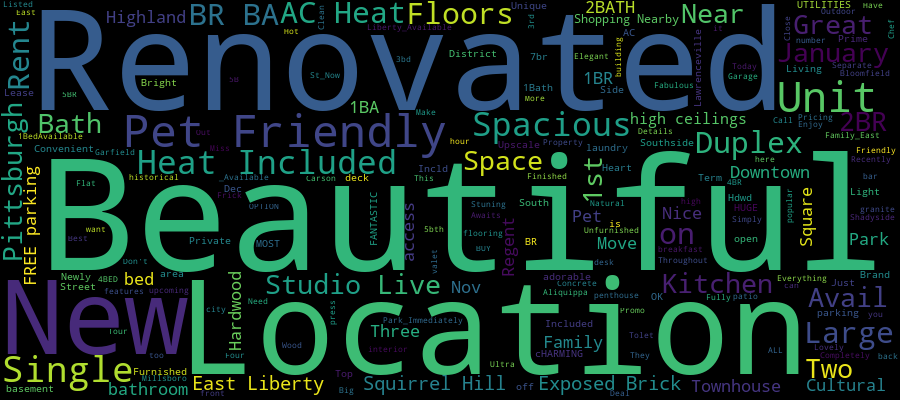

In [20]:
# Words to be eliminated 
stopwords = set({"Apartment","Home","House",
                 "Bedroom","One","Floor",
                 "Now","Updated","Available",
                 "and","of","for","Bd","ASAP","in","the","to","Your","with"})

# Word Cloud
WordCloud(width = 900, height = 400, stopwords = stopwords).generate(' '.join(df_housing['name'])).to_image()

In [21]:
# From variable `geotag` extract latitude and longitude
df_housing['lat'] = df_housing.geotag.apply(lambda v: v[0])
df_housing['lon'] = df_housing.geotag.apply(lambda v: v[1])

# For a discrete legend: convert `bedrooms` to an object
df_housing.bedrooms = df_housing.bedrooms.fillna(0).astype('category')


# Points map across Pittsburgh
fig = px.scatter_mapbox(df_housing, 
                        lat        = "lat", 
                        lon        = "lon", 
                        color      = "bedrooms",
                        size       = "price",
                        hover_data =["area"],
                        labels     = {"price": "Price ($) ", "area": "Area (ft2) ", "bedrooms": "Bedrooms"},
                        zoom       = 12, 
                        width      = 950, height = 500,
                       )
fig.update_layout(mapbox_style     = "carto-darkmatter",
                  margin           = {"r":0, "t":0, "l":0, "b":0})
fig.show()

## <a id = "con">Conclusion</a>

## <a id = "ref">References</a>

* https://pypi.org/project/python-craigslist/
* https://github.com/juliomalegria/python-craigslist
* https://pittsburgh.craigslist.org/
* https://plot.ly/python/plotly-express/
* https://coolors.co/app

## <a id = "anx">Annexes:</a>

### <a id = "web">Web-scrapping Craigslist</a>

### <a id = "plt">Plotly</a>

In [ ]:
Other options:
- To normalize the histogram we can ass options such as `histnorm = 'probability density'`
- Change color: color_discrete_sequence  = ["#59344F"]

# Not continous bars: cuts per observations
px.bar(df_housing, 
       x      = "bedrooms",
       title  = "Number of bedrooms",
       labels = {"bedrooms": "Bedrooms"},
       width  = 900, height = 500).show()

# For one box plot
px.box(df_housing,
       y = "area",
       points = "all",
       width  = 400, height = 400).show()

# Scatter plot Price vs. Area
px.scatter(df_housing.dropna(), 
           x     = "area", 
           y     = "price", 
           trendline = 'ols',
           width = 900, height = 400).show()